<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2">Business Problem</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3">Data</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4">Feature Engineering</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-5">Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Opportunities" data-toc-modified-id="Opportunities-5.1">Opportunities</a></span></li></ul></li><li><span><a href="#Appendix-A" data-toc-modified-id="Appendix-A-6">Appendix A</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries-and-Load-Data" data-toc-modified-id="Import-Libraries-and-Load-Data-6.1">Import Libraries and Load Data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-6.2">Data Cleaning</a></span></li></ul></li><li><span><a href="#Months-Passed" data-toc-modified-id="Months-Passed-7">Months Passed</a></span></li></ul></div>

# Day & Ross Freight: Sales Opportunity Win Prediction, an Analysis of Salesforce Data

\begin{itemize}
\item One
\item Two
\end{itemize}


${\displaystyle y_{i}=\beta _{0}+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}=\mathbf {x} _{i}^{\mathsf {T}}{\boldsymbol {\beta }}+\varepsilon _{i},\qquad i=1,\ldots ,n,}{\displaystyle y_{i}=\beta _{0}+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}=\mathbf {x} _{i}^{\mathsf {T}}{\boldsymbol {\beta }}+\varepsilon _{i},\qquad i=1,\ldots ,n,}$

In [41]:
import numpy as np
import pandas as pd
from numpy import mean
import seaborn as sns

## Introduction

Headquartered in Hartland, New Brunswick, Day & Ross Freight Inc. is a Canadian transportation and
logistics company that was founded more than 65 years ago. It has grown from a few trucks hauling goods
in eastern Canada into one of the nation’s largest national transportation providers. It is a wholly owned
subsidiary of McCain Foods Limited (Day & Ross Transportation Group, 2017).

Companies that apply data driven decision making perform better than those in which decision makers
rely on subjective models based on experience (Provost and Fawcett, 2013). Day & Ross Inc. have used
Salesforce.com’s Sales Cloud for several years, and through it, sales representatives and executives at the
company can access various reports and dashboards summarizing data on the sales pipeline (Finelli, 2018). A
move up the Analytics Maturity Model (TDWI, 2016) through the application of machine learning techniques
could allow Day & Ross Inc. to better leverage their Salesforce.com data.

This report presents the results of the the machine learning models that were applied to predict whether an
opportunity would be won or lost and the factors that have influence. Two models were built using logistic
regression and random forest. In addition the data was explored, visualized, cleaned and appropriate features
were selected.

## Business Problem

A sales pipeline is a method of selling based on the fundamental principles of the sales process. 
It describes the sequence of steps that a sales person takes from first contact with a potential 
customer, to qualifying that prospect as a lead, to the validation of that lead into an opportunity, 
and moving through further stages until it is closed. Day & Ross monitors this sales 
pipeline using Salesforce.com, the world's largest CRM software vendor (Columbus, 2016). 
Figure 1 shows a Kanban Chart displayed in a typical Salesforce.com's Sales Cloud application 
showing the current pipeline of opportunities and their values.

The use of machine learning technology in business is predicted to double by the end of 2018 
(Deloitte, 2017). The major CRM players are all betting that machine learning and artificial 
intelligence will be the next major industry disruptor, and have already implemented machine 
learning software in their CRM systems, including
Oracle's Adaptive Intelligence, Microsoft's Cortana Intelligence Suite, and Salesforce's 
Enstein AI (Evans, 2018).

Day & Ross, much like any company, would like to increase the number of opportunities that they win. 
There are many demands on a sales representative's time and by scoring opportunities with the 
probability of success a rep can concentrate on those deals that are more likely to succeed 
and waste less time on those with very little chance of success. In addition, by knowing 
which factors are most correlated with winning an opportunity a business can focus on 
those activities that are most likely to move the needle.

\begin{figure}
\centering
\includegraphics[width=1]{pic/kanban.png}
\caption{Kanban chart of open opportunities in Salesforce.com’s Sales Cloud.}
\label{image-myimage}
\end{figure}


## Data

Salesforce.com data is contained in standard and custom objects, which can be thought of in database terms
as tables. All records for the objects relevant to this project were exported and provided to the author using
Salesforce.com’s Apex Data Loader (for events and tasks), or by means of a custom report.

Table 1 Shows the Salesforce.com objects used in this study. Opportunity is the main object of interest
and contains fields such as the stage, the reason, the expected revenue and the start and close date of the
opportunity. The other tables are related to the opportunity table through lookup fields (this is akin to the
referential integrity of a database).

The user table, related through the User Id, shows details about the owner of the opportunity, and the
account table, related through the Account Id, shows details about the associated account. The event and
task tables are used interchangeably and display details about the activities a sales representative has with a
client, for example, if they call or email them. These activity tables are related to the opportunity through
the WhatId field. The contact table shows information about the people who work at the business that’s
related to the opportunity.

| Tables   |      Are      |  Cool |
|----------|:-------------:|------:|
| col 1 is |  left-aligned | \$1,600 |
| col 2 is |    centered   |   \$12 |
| col 3 is | right-aligned |   \$1 |

|Salesforce Object| No. of Records|Description|
|:-: |-|:---|
|Opportunity |16,913 | All opportunities, their names, potential revenue, stage, start date and closed date, type, and reason.|
|Account |53,985 |The account associated with the opportunity - each opportunity references only one account.|
|Contact |53,161 | The contact from the client’s company referenced by the opportunity.|
|User    |180| The Day & Ross employee who owns the opportunity - each opportunity is owned by only one user.|
|Event   |64,275| The activities related to an opportunity, or the associated account, for example a call or email.|
|Task     |770,532| Tasks are used interchangeably with events so the tables were combined.|

In [3]:
opportunities = pd.read_csv("data/AM - Opportunities.csv", \
                            encoding="latin-1")

## Feature Engineering

In [26]:
accounts = pd.read_csv("data/AM - Accounts.csv",\
                      encoding="latin-1")

In [29]:
contacts = pd.read_csv("data/AM - Contacts.csv",\
               encoding="latin-1")

In [31]:
contacts.head(3)

,Account ID,Account Name,Contact ID,First Name,Last Name,No Longer Available,Mailing Street,Mailing City,Mailing State/Province,Mailing Country,Mailing Zip/Postal Code,Email,Description,Created Date
0,0010B00001v8sB7,Hermatz Corpy LLC,0030B0000278KdA,Marina,Jin,0,553 Alta Road Unit 3,San Diego,California,USA,92154,hermatzcorpyllc@hotmail.com,NaN,1/11/2017
1,001U0000007ferU,Columbia Remtec Mfg,003U0000008MlPU,Frank,Putland,0,NaN,NaN,NaN,NaN,NaN,fputland@columbia-remtec.com,NaN,15/12/2011
2,001U000000WS6Qt,ABS CANADA,003U000000XEUOt,Judith,Riley,0,1401 Meyerside Drive Unit # 2,Mississauga,ON,CAN,NaN,judith.riley@sulzer.com,NaN,18/12/2012


In [67]:
tasks = pd.read_csv("data/TasksAll.csv",\
                   encoding="latin-1")

/Users/alexeimarcilio/gbc/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (21,26,28,29,30,31,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [68]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770532 entries, 0 to 770531
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         770532 non-null  object 
 1   WHOID                      412643 non-null  object 
 2   WHATID                     551495 non-null  object 
 3   SUBJECT                    770530 non-null  object 
 4   ACTIVITYDATE               715895 non-null  object 
 5   STATUS                     770532 non-null  object 
 6   PRIORITY                   770532 non-null  object 
 7   ISHIGHPRIORITY             770532 non-null  bool   
 8   OWNERID                    770532 non-null  object 
 9   DESCRIPTION                679762 non-null  object 
 10  TYPE                       739561 non-null  object 
 11  ISDELETED                  770532 non-null  bool   
 12  ACCOUNTID                  647676 non-null  object 
 13  ISCLOSED                   77

In [36]:
events = pd.read_csv("data/Events (DEL INCLD).csv",\
                    encoding="latin-1")

/Users/alexeimarcilio/gbc/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64275 entries, 0 to 64274
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        64275 non-null  object 
 1   WHOID                     21611 non-null  object 
 2   WHATID                    40773 non-null  object 
 3   SUBJECT                   64251 non-null  object 
 4   LOCATION                  10087 non-null  object 
 5   ISALLDAYEVENT             64275 non-null  bool   
 6   ACTIVITYDATETIME          63416 non-null  object 
 7   ACTIVITYDATE              64269 non-null  object 
 8   DURATIONINMINUTES         64275 non-null  int64  
 9   STARTDATETIME             64269 non-null  object 
 10  ENDDATETIME               64269 non-null  object 
 11  DESCRIPTION               36052 non-null  object 
 12  ACCOUNTID                 47311 non-null  object 
 13  OWNERID                   64275 non-null  object 
 14  TYPE  

In [33]:
opportunities['Reason'].unique()

array([nan, 'No Equipment', 'Cross-functional between divisions',
       'Relationship', 'Price', 'Needs other Features',
       'Not Qualified Correctly', 'Unknown', 'Solution',
       'Cancelled Project', 'Prior competitor relationship',
       'Change in D/M', 'Contract w/ Current Solution',
       'Prior Negative D&R Experience', 'Speed of Resolution',
       'Incorrect Fit', 'Online Shipping', 'Canadian', 'Terms',
       'Credit Issue', 'Risk too high', 'Driver', 'VIP'], dtype=object)

In [22]:
deals = pd.read_csv("data/deals.csv")

In [23]:
deals

,Unnamed: 0,Stage,Type,PotRevenue,AccCalls,AgeInDays,TotOpCalls,UserTotCalls,UserTenure,AccountAge,NumContacts,NumOppEmails,NumAccEmails,CanOrNot,Win
0,1,Closed Lost,New Business,4800,2,101,7,41063,2079,534,1,5,11,1,0
1,2,Closed Lost,New Business,24000,1,64,2,1907,950,534,1,0,0,1,0
2,3,Closed Won,New Business,2400,7,52,3,28836,1890,534,2,1,6,1,1
3,4,Closed Lost,Expanded,20000,17,45,0,12081,1771,534,8,0,9,1,0
4,5,Closed Won,New Business,20000,12,37,3,12081,1771,534,8,0,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16862,16909,Closed Lost,New Business,43200,5,111,6,5125,1771,836,1,0,0,0,0
16863,16910,Closed Lost,New Business,28800,2,67,2,5125,1771,836,1,0,0,0,0
16864,16911,Closed Won,New Business,15000,2,176,2,3794,1771,835,1,0,0,1,1
16865,16912,Closed Won,New Business,6000,19,45,0,41063,2079,835,3,0,53,1,1


In [39]:
accounts

,Account ID,Account Name,Billing Street,Billing City,Billing State/Province,Billing Zip/Postal Code,Billing Country,Parent Account,Parent Account ID,Created Date
0,001U000000cezKS,WHITE PAPER - MONTREAL,650 Rue McCaffrey,Saint-Laurent,QC,H4T1N1,NaN,WHITE PAPER COMPANY,001U000000cerI2,19/07/2013
1,001U000000qlXfi,ECOCART,4815 Vanhorne Po BOX 63553,Montreal,QC,H3W1J0,CA,NaN,NaN,4/7/2014
2,001U000000WSBKy,SMS EQUIPMENT INC,1945 55IEEME AVENUE SUD,DORVAL,PQ,H9P1G9,CA,NaN,NaN,15/12/2011
3,001U000000WSCMX,WHITE PAPER - TORONTO,210 Travail Road,Markham,ON,L3S3J1,CA,WHITE PAPER COMPANY,001U000000cerI2,3/4/2013
4,001U000000qkOy9,MBW Courier,NaN,NaN,NS,NaN,NaN,NaN,NaN,2/7/2014
...,...,...,...,...,...,...,...,...,...,...
53980,0010B00001oFZiL,SOURCE ATL NFL,38 BECLIN RD,MOUNT PEARL,NF,A1N 5N8,NaN,SOURCE ATLANTIC HO,001U000001eEYAI,16/01/2017
53981,0010B00001oFZuy,SOURCE ATL - TRACY,16 MAST RD,TRACY,NB,E5L2W1,NaN,SOURCE ATLANTIC HO,001U000001eEYAI,16/01/2017
53982,0010B00001oFZt2,SOURCE ATL PEI,130 LONGWORTH AVE,CHARLOTTETOWN,PE,C1A5A8,NaN,SOURCE ATLANTIC HO,001U000001eEYAI,16/01/2017
53983,001U000001j4zE4,Solis,165 Summerlea Road,Brampton,ON,L6T 4P6,Canada,Yusen Logistics (Canada) Inc,001U000001bkKf0,27/06/2016


$
{\displaystyle \mathbf {y} =X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},\,}{\displaystyle \mathbf {y} =X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},\,}$

In [41]:
users = pd.read_csv("data/AM - Freight Users.csv",
                   encoding="latin-1")

In [42]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User ID             180 non-null    object
 1   Username            180 non-null    object
 2   Last Name           180 non-null    object
 3   First Name          180 non-null    object
 4   Profile: Name       180 non-null    object
 5   Role: Name          180 non-null    object
 6   Department          178 non-null    object
 7   Manager: Full Name  167 non-null    object
 8   Active              180 non-null    int64 
 9   Created Date        180 non-null    object
dtypes: int64(1), object(9)
memory usage: 14.2+ KB


In [43]:
opportunities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16913 entries, 0 to 16912
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Opportunity ID                  16913 non-null  object 
 1   Opportunity Name                16913 non-null  object 
 2   Type                            16913 non-null  object 
 3   Stage                           16913 non-null  object 
 4   Reason                          15867 non-null  object 
 5   Revenue Potential               16873 non-null  float64
 6   Created Date                    16913 non-null  object 
 7   Close Date                      16913 non-null  object 
 8   Service Offering Name           15670 non-null  object 
 9   Annual Revenue Potential        16873 non-null  float64
 10  User ID                         16913 non-null  object 
 11  Opportunity Owner               16913 non-null  object 
 12  Owner Role                      

In [60]:
import seaborn as sns

In [45]:
opportunities['Opportunity Owner: Department'].unique()

array(['West Freight', 'Maritimes Freight', 'Ontario Freight',
       'Small Enterprise Sales', 'Quebec Freight',
       'National Accts Freight', nan, 'Toronto Freight',
       'Truckload Freight', 'USA Freight', 'Freight Executive',
       'Ontario National Accounts Freight', 'National Accounts Freight',
       'Supply Chain'], dtype=object)

In [47]:
opportunities['Stage'].unique()

array(['Proposal', 'Closed Lost', 'Closed Won', 'Negotiation',
       'Agreed Shipping', 'Shipping', 'Qualification',
       'Solution Development', 'Prospecting'], dtype=object)

## Data Exploration

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

### Opportunities

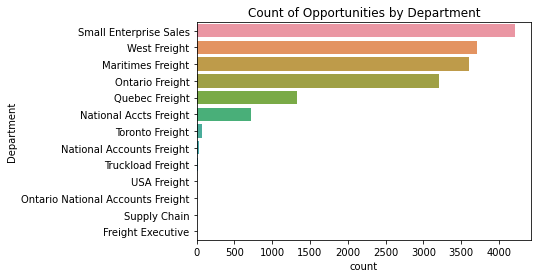

In [98]:
sns.countplot(data=opportunities, y='Opportunity Owner: Department',orient="horizontal",\
             order=opportunities['Opportunity Owner: Department'].value_counts().index)
plt.title("Count of Opportunities by Department");
plt.ylabel("Department");

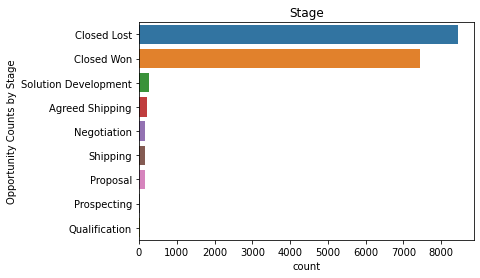

In [97]:
sns.countplot(data=opportunities, y='Stage',orient="horizontal",\
             order=opportunities['Stage'].value_counts().index)
plt.title("Stage");
plt.ylabel("Opportunity Counts by Stage");


In [4]:
opportunities

,Opportunity ID,Opportunity Name,Type,Stage,Reason,Revenue Potential,Created Date,Close Date,Service Offering Name,Annual Revenue Potential,User ID,Opportunity Owner,Owner Role,Opportunity Owner: Department,Account Number: Record ID,Account Number: Account Number,Account ID,Account Name
0,0060B00000eO1v0,MITYBILT - BC PROJECT (TL),Expanded,Proposal,NaN,50000.0,31/12/2017,31/03/2018,SCS TL / LTL,50000.04,0050B000007Fk56,Ainsley McWhirter,Freight West Account Executive Prairies,West Freight,a0CU000000DYoz9,82623,001U000000WSABn,MITYBILT PRODUCTS
1,0060B00000eO1YB,COLE INTERNATIONAL - US TL - HUMBLE TX TO HALI...,Expanded,Closed Lost,No Equipment,40000.0,31/12/2017,22/01/2018,NaN,40000.00,005U00000027Cb4,Miriam Watts,Maritimes AE: Freight,Maritimes Freight,a0CU000000QdXmI,67466,001U0000007fy5P,COLE INTERNATIONAL - HALIFAX
2,0060B00000eO2AD,LTL US ITR America,New Business,Closed Won,Cross-functional between divisions,10800.0,31/12/2017,31/12/2017,LTL USA,10800.00,005U0000001Dcbw,Alvin Rodricks,Freight Ontario: Account Executive,Ontario Freight,a0C0B00000re88m,127325,0010B00001w2sZ5,ITR America
3,0060B00000eO295,TL MILLER & SMITH,New Business,Closed Won,Relationship,24000.0,31/12/2017,31/12/2017,Asset TL BH/Needed Lanes,24000.00,005U0000001Dcbw,Alvin Rodricks,Freight Ontario: Account Executive,Ontario Freight,a0CU000000DYlnL,22349,001U000000WSAAG,MILLER & SMITH FOODS INC
4,0060B00000eO1YL,DALCAM SANITATION - DOMESTIC LTL - ON & QC INT...,Expanded,Negotiation,NaN,10632.0,31/12/2017,22/03/2018,LTL Domestic,10632.00,005U00000027Cb4,Miriam Watts,Maritimes AE: Freight,Maritimes Freight,a0C0B00000jTNQc,143949,001U000000WS7yL,DALCAM SANITATION SOLUTIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16908,006U000000BnOOs,GCR LTL Newfoundland and Quebec,New Business,Closed Won,Relationship,14400.0,1/8/2013,28/03/2014,LTL Domestic,14400.00,005U0000001Dcbx,Brent Ryan,Maritimes AE: Freight,Maritimes Freight,a0CU000000DZZ9I,66527,001U000000WSV6A,GCR Tire Centre - Moncton
16909,006U000000AVd7K,Clippe from Va to Ont and West- US LTL,Expanded,Closed Lost,Cancelled Project,96000.0,1/5/2013,9/8/2013,LTL USA,96000.00,005U0000001Dcbx,Brent Ryan,Maritimes AE: Freight,Maritimes Freight,a0CU000000E4F0s,127904,001U000000WSIi9,WHEELS CLIPPER
16910,006U000000AVfcp,Ex Whitby,Expanded,Closed Lost,Cancelled Project,100800.0,1/5/2013,24/09/2013,LTL Domestic,100800.00,005U0000001Dcar,Michelle Barrett,Freight Ontario: Account Executive,Ontario Freight,a0CU000000DYpqG,3720,001U000000WS6p1,ATLANTIC PACKAGING PRD
16911,006U000000AVd5e,Keltic i/b USA LTL to NFLD,Expanded,Closed Lost,Price,12000.0,1/5/2013,23/09/2013,LTL USA,12000.00,005U00000027CbE,Shawn Lizotte,Maritimes AE: Freight,Maritimes Freight,a0CU000000DYlc8,34326,001U000000WS9Wf,KELTIC TRANSPORTATION Head Office MTN


In [5]:
opportunities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16913 entries, 0 to 16912
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Opportunity ID                  16913 non-null  object 
 1   Opportunity Name                16913 non-null  object 
 2   Type                            16913 non-null  object 
 3   Stage                           16913 non-null  object 
 4   Reason                          15867 non-null  object 
 5   Revenue Potential               16873 non-null  float64
 6   Created Date                    16913 non-null  object 
 7   Close Date                      16913 non-null  object 
 8   Service Offering Name           15670 non-null  object 
 9   Annual Revenue Potential        16873 non-null  float64
 10  User ID                         16913 non-null  object 
 11  Opportunity Owner               16913 non-null  object 
 12  Owner Role                      

In [12]:
# Let's remove all the values that are not in Stage "Closed Won" or "Closed Lost"

opportunities = opportunities[opportunities['Stage'].isin(["Closed Won", "Closed Lost"])]

# Let's check the values
opportunities['Stage'].unique()

array(['Closed Lost', 'Closed Won'], dtype=object)

In [13]:
opportunities.rename(columns={'Opportunity Owner: Department':'Department'}, inplace=True)

In [18]:
opportunities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15869 entries, 1 to 16912
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Opportunity ID                  15869 non-null  object 
 1   Opportunity Name                15869 non-null  object 
 2   Type                            15869 non-null  object 
 3   Stage                           15869 non-null  object 
 4   Reason                          15867 non-null  object 
 5   Revenue Potential               15832 non-null  float64
 6   Created Date                    15869 non-null  object 
 7   Close Date                      15869 non-null  object 
 8   Service Offering Name           14663 non-null  object 
 9   Annual Revenue Potential        15832 non-null  float64
 10  User ID                         15869 non-null  object 
 11  Opportunity Owner               15869 non-null  object 
 12  Owner Role                      

In [49]:
opportunities['Department'].value_counts()

KeyError: 'Department'

In [48]:
ax = sns.barplot(y="Department", x="Win", data=opportunities, estimator=mean,\
                orient="h", ci=None, 
                order=['Quebec Freight','National Accts Freight','Ontario Freight',\
                      'West Freight','Ontario National Accounts Freight',
                      'Maritimes Freight',\
                      "Small Enterprise Sales"])
plt.title("Percent of Winning Opportunities by Department \n (Only Departments with > 100 \
Opportunities shown)");
#plt.xticks(["0","10","20","30","40","50","60"])
plt.ylabel("Department")
plt.xlabel("Winning Percentage");


NameError: name 'mean' is not defined

## Appendix A

The following section contains the Python code for data cleaning and visualization used in this project.

### Import Libraries and Load Data

The data were received in Excel files. We must import the necessary libraries and load the data.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
opportunities = pd.read_csv("data/AM - Opportunities.csv", \
                            encoding="latin-1")

In [7]:
tasks = pd.read_csv("data/TasksAll.csv",\
                   encoding="latin-1")

/Users/alexeimarcilio/gbc/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (21,26,28,29,30,31,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Data Cleaning

In [8]:
# Create a column "Win" which is 1 if "Closed Won" and 0 if not.
# We check if the column exists first

if 'Win' not in opportunities.columns:
    opportunities['Win'] = [1 if x =='Closed Won' else 0 for x in opportunities['Stage']] 

In [9]:
# Update the age of all open opportunities to Feb 7, 2018
opportunities.loc[~opportunities['Stage'].isin(["Closed Won", "Closed Lost"]),['Close Date']] = '7/2/2018'

In [10]:
# Rename ID Column
opportunities.rename({'Opportunity ID': 'OppID'}, axis=1, inplace=True)

In [11]:
# Update the date fields to date format
opportunities['Created Date'] = pd.to_datetime(opportunities['Created Date'],\
                                              format="%d/%m/%Y")
opportunities['Close Date'] = pd.to_datetime(opportunities['Close Date'],\
                                              format="%d/%m/%Y")

In [12]:
# Update Account IDs to strings
opportunities['Account ID'] = opportunities['Account ID'].astype(str)
# Update Opportunity IDs to strings
opportunities['OppID'] = opportunities['OppID'].astype(str)
# Update WhatID in Tasks to string
tasks['WHATID'] = tasks['WHATID'].astype(str)

In [13]:
# Calculate the age in days and create a new column
opportunities['AgeInDays'] = (opportunities['Close Date'] - opportunities['Created Date'])
opportunities['AgeInDays'] = opportunities['AgeInDays'] / np.timedelta64(1, 'D')
opportunities['AgeInDays'] = opportunities['AgeInDays'].astype(int)

In [14]:
# Opportunity Calls are all the calls made on that opportunity. 
# The WhatID in Tasks = opportunityID
# There are three types of activities - Calls, Task, and Emails to lets capture each seperately


In [15]:
# Let us create dummy variables for each type of task and group by OpportunityID (WhatID)
features = ["TASKSUBTYPE"]
taskCallsDum = pd.get_dummies(tasks[features])
tasksCalls = tasks[['WHATID','TASKSUBTYPE']]
dfCalls = pd.concat([tasksCalls, taskCallsDum], axis=1)
dfCalls.head(5)
dfCalls.columns = ['OppID', 'Type', 'Calls', 'Emails', 'Tasks']

In [16]:
# Now we can group by OppID
dfCallsGrouped = dfCalls.groupby('OppID')
CallsCount = dfCallsGrouped.sum()

In [17]:
CallsCount.reset_index(level=0, inplace=True)
# The OppIDs in Tasks have an addition 3 characters - let's truncate them
CallsCount['OppID'] = CallsCount['OppID'].str[:15]

In [18]:
# Let's merge the tables so we have coumns for total Calls
Opps = pd.merge(opportunities, CallsCount, how='left', on=['OppID'])

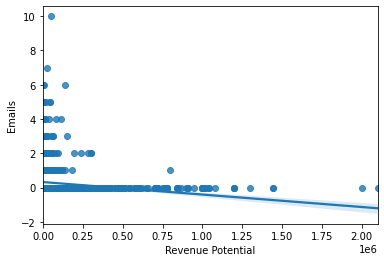

In [21]:
ax = sns.regplot(x="Revenue Potential", y="Emails", data=Opps)

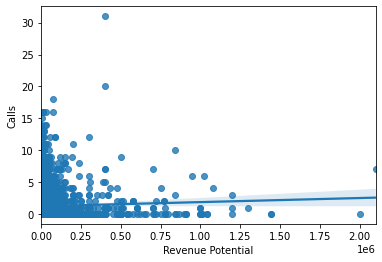

In [22]:
ax = sns.regplot(x="Revenue Potential", y="Calls", data=Opps)

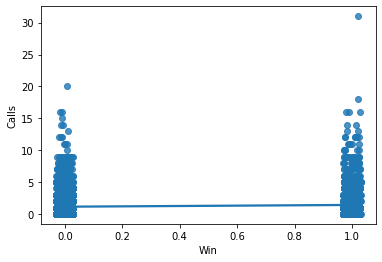

In [23]:
ax = sns.regplot(x="Win", y="Calls", data=Opps, x_jitter=.03)

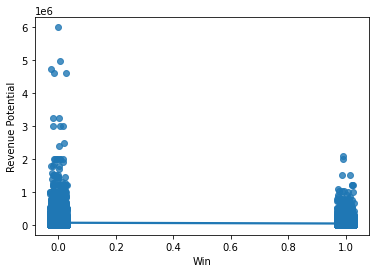

In [410]:
ax = sns.regplot(x="Win", y="Revenue Potential", data=Opps, x_jitter=.03)

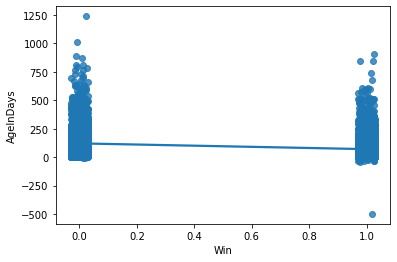

In [417]:
ax = sns.regplot(x="Win", y="AgeInDays", data=Opps, x_jitter=.03)

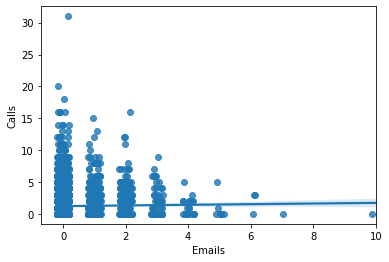

In [209]:
ax = sns.regplot(x="Emails", y="Calls", data=Opps, x_jitter=0.2)

In [24]:
WinAge = Opps.groupby('Win')

In [26]:
winByAge = (WinAge.mean())

In [29]:
winByAge.reset_index(level=0, inplace=True)

In [37]:
winByAge['Win'] = winByAge['Win'].astype(str)

In [45]:
winByAge['Win'] = ['Lose','Win']

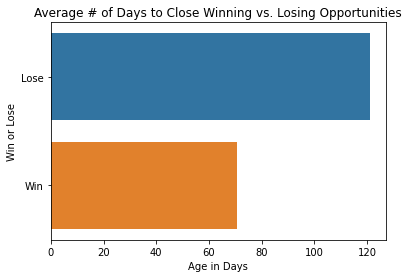

In [52]:
# Check the mean age in days of winning vs losing opportunities
sns.barplot(data=winByAge, y="Win", x='AgeInDays', orient="h")
plt.title("Average # of Days to Close Winning vs. Losing Opportunities");
#plt.xticks(["0","10","20","30","40","50","60"])
plt.ylabel("Win or Lose")
plt.yticks([0,1])
plt.xlabel("Age in Days");

In [98]:
# Let's look at win rate by Department
deptGroup = Opps.groupby('Opportunity Owner: Department')
depWinRate = deptGroup.mean('Win')

In [99]:
depWinRate.reset_index(level=0, inplace=True)

In [100]:
depWinRate = depWinRate[depWinRate['Win'] > 0]
depWinRate['Win'] = depWinRate['Win'] * 100
depWinRate.sort_values('Win',ascending=False, inplace=True)

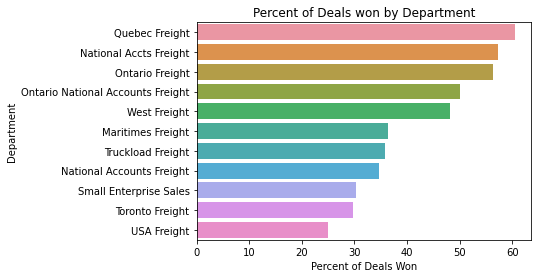

In [101]:
# Check the winning Rate by Department
sns.barplot(data=depWinRate, y='Opportunity Owner: Department', x='Win', orient="h")
plt.title("Percent of Deals won by Department");
#plt.xticks([100,200,300,400,500,60])
plt.ylabel("Department")
plt.xlabel("Percent of Deals Won");

In [102]:
ageGrp = Opps.groupby('AgeInDays')

In [109]:
ageGrp.mean()

,Revenue Potential,Annual Revenue Potential,Win,Calls,Emails,Tasks
AgeInDays,,,,,,
-499,40000.0,40000.0,1.0,NaN,NaN,NaN
-45,5000.0,5000.0,1.0,NaN,NaN,NaN
-38,200000.0,200000.0,1.0,NaN,NaN,NaN
-35,19250.0,19250.0,1.0,0.0,0.0,1.0
-31,100000.0,100000.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...
872,0.0,0.0,0.0,NaN,NaN,NaN
893,1000000.0,1000000.0,0.0,NaN,NaN,NaN
910,24000.0,24000.0,1.0,0.0,0.0,2.0


In [110]:
Opps[['AgeInDays','Win']]

,AgeInDays,Win
0,38,0
1,22,0
2,0,1
3,0,1
4,38,0
...,...,...
16908,239,1
16909,100,0
16910,146,0
16911,145,0


In [198]:
# Add a Week column every 7 days
import math
Opps['WeeksPassed'] = ((Opps['AgeInDays'] / 7))
Opps['WeeksPassed'] = Opps['WeeksPassed'].apply(math.trunc)

In [199]:
Opps[['AgeInDays','WeeksPassed']]

,AgeInDays,WeeksPassed
0,38,5
1,22,3
2,0,0
3,0,0
4,38,5
...,...,...
16908,239,34
16909,100,14
16910,146,20
16911,145,20


In [145]:
# Let's check win percentage by weeks passed
weekGroup = Opps.groupby('WeeksPassed')

In [176]:
# Let's check the percentage of Deals one as the opportunities age week by week
week = []
pct = []
for i in range(0,30):
    Pct = Opps[Opps['WeeksPassed'] == i]['Win'].mean()
    week.append(i)
    pct.append(Pct)

data = {'Week':week,'Pct':pct}
df = pd.DataFrame(data)

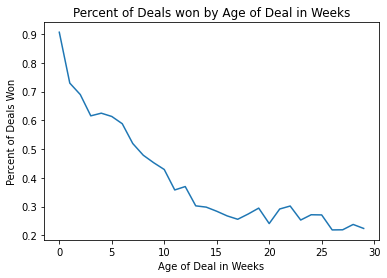

In [194]:
# Check the winning Rate by Department
sns.lineplot(data=df, y='Pct', x='Week')
plt.title("Percent of Deals won by Age of Deal in Weeks");
#plt.xticks([100,200,300,400,500,60])
plt.ylabel("Percent of Deals Won")
plt.xlabel("Age of Deal in Weeks");

## Months Passed

In [200]:
# Add a Week column every 7 days
import math
Opps['MonthsPassed'] = ((Opps['AgeInDays'] / 30))
Opps['MonthsPassed'] = Opps['MonthsPassed'].apply(math.trunc)

In [201]:
Opps[['AgeInDays','MonthsPassed']]

,AgeInDays,MonthsPassed
0,38,1
1,22,0
2,0,0
3,0,0
4,38,1
...,...,...
16908,239,7
16909,100,3
16910,146,4
16911,145,4


In [145]:
# Let's check win percentage by weeks passed
monthGroup = Opps.groupby('MonthsPassed')

In [205]:
# Let's check the percentage of Deals one as the opportunities age week by week
month = []
pct = []
for i in range(0,10):
    Pct = Opps[Opps['MonthsPassed'] == i]['Win'].mean()
    month.append(i)
    pct.append(Pct)

data = {'Month':month,'Pct':pct}
dfMonth = pd.DataFrame(data)

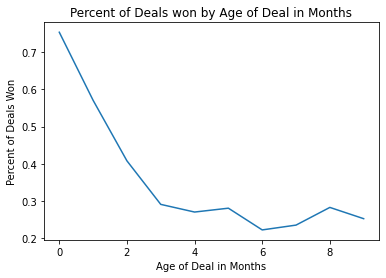

In [206]:
# Check the winning Rate by Department
sns.lineplot(data=dfMonth, y='Pct', x='Month')
plt.title("Percent of Deals won by Age of Deal in Months");
#plt.xticks([100,200,300,400,500,60])
plt.ylabel("Percent of Deals Won")
plt.xlabel("Age of Deal in Months");

In [210]:
Opps['Win'].mean()

0.4393661680364217